In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
os.chdir('/Users/davidmiles-skov/Desktop/special_courses/materials_characterization/xrd_analysis/AutoXRD') # change working directory to root folder

In [12]:
# utils
from utils.grid_handlers import measurement_grid
from utils.data_loaders import read_XRD
from utils.plotting import plot_grid, plot_data

Taking a look at Anat's data

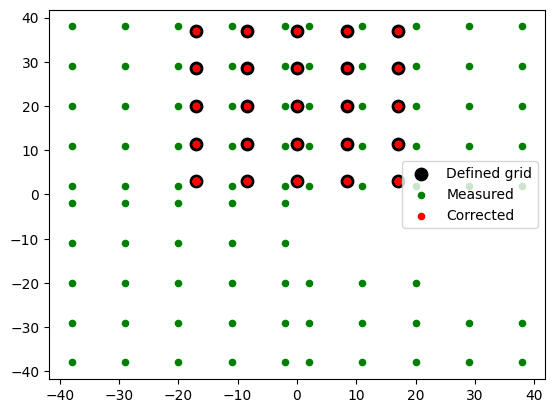

In [13]:
# NOTE: Taking some code from 'intern-data-handling'

#  Not 100% sure what all of this is doing

grid = measurement_grid(5,5,34,34,-17,3) # BR_map 3mm margin (back sample)

# Load from path

path = 'data/anait_0016_Ba_all.txt'
initial_data, coords = read_XRD(path, grid, n = 100, separator = "\t")
plot_grid(coords,grid)

In [14]:
datatype_y= 'Intensity (counts)'
datatype_x='2θ (°)'

# plot_data(initial_data, datatype_x, datatype_y,plotscale = 'log')
# display(initial_data)

It appears that Anat's data is probably formatted in a different way than Lena's

In [15]:
# Dictionary to store individual DataFrames
dfs = {}

# Loop over unique coordinates in the MultiIndex columns
for coord in initial_data.columns.get_level_values(0).unique():
    # Select columns belonging to the coordinate
    dfs[coord] = initial_data[coord]  # This keeps the second level ('Data type')

# Check one of the split DataFrames
print(dfs.keys())  # List of coordinate names

dict_keys(['-17.0,3.0', '-8.5,3.0', '0.0,3.0', '-17.0,11.5', '-8.5,11.5', '0.0,11.5', '-17.0,20.0', '-8.5,20.0', '0.0,20.0', '-17.0,28.5', '-8.5,28.5', '0.0,28.5', '-17.0,37.0', '-8.5,37.0', '0.0,37.0', '8.5,3.0', '17.0,3.0', '8.5,11.5', '17.0,11.5', '8.5,20.0', '17.0,20.0', '8.5,28.5', '17.0,28.5', '8.5,37.0', '17.0,37.0'])


In [16]:
# Inspecting first df
col_1 = list(dfs.keys())[0]

print(dfs[col_1])
# Drop the "Data type" thing
dfs[col_1].columns.name = None


Data type  2θ (°)  Intensity (counts)  2θ (°)  Intensity (counts)  2θ (°)  \
0           15.00            409.0166   15.00            430.3639   15.00   
1           15.01            407.6708   15.01            425.1343   15.01   
2           15.02            406.1328   15.02            419.1576   15.02   
3           15.03            405.5370   15.03            413.7518   15.03   
4           15.04            408.5557   15.04            410.5355   15.04   
...           ...                 ...     ...                 ...     ...   
6996          NaN                 NaN     NaN                 NaN     NaN   
6997          NaN                 NaN     NaN                 NaN     NaN   
6998          NaN                 NaN     NaN                 NaN     NaN   
6999          NaN                 NaN     NaN                 NaN     NaN   
7000          NaN                 NaN     NaN                 NaN     NaN   

Data type  Intensity (counts)  2θ (°)  Intensity (counts)  2θ (°)  \
0     

In [17]:
print(dfs[col_1].isna().sum())  # Count missing values per column
dfs[col_1].dropna(inplace=True)
print(dfs[col_1])  # Should show fewer rows if NaNs existed


2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
2θ (°)                1500
Intensity (counts)    1500
dtype: int64
      2θ (°)  I

/var/folders/0h/y4r0kpjd647_xv_scm0kjtvr0000gn/T/ipykernel_90880/3827901867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[col_1].dropna(inplace=True)


Index(['2θ (°)', 'Intensity (counts)', '2θ (°)', 'Intensity (counts)',
       '2θ (°)', 'Intensity (counts)', '2θ (°)', 'Intensity (counts)',
       '2θ (°)', 'Intensity (counts)', '2θ (°)', 'Intensity (counts)',
       '2θ (°)', 'Intensity (counts)', '2θ (°)', 'Intensity (counts)',
       '2θ (°)', 'Intensity (counts)', '2θ (°)', 'Intensity (counts)',
       '2θ (°)', 'Intensity (counts)', '2θ (°)', 'Intensity (counts)',
       '2θ (°)', 'Intensity (counts)', '2θ (°)', 'Intensity (counts)',
       '2θ (°)', 'Intensity (counts)', '2θ (°)', 'Intensity (counts)',
       '2θ (°)', 'Intensity (counts)', '2θ (°)', 'Intensity (counts)'],
      dtype='object')
Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       5491, 5492, 5493, 5494, 5495, 5496, 5497, 5498, 5499, 5500],
      dtype='int64', length=5501)


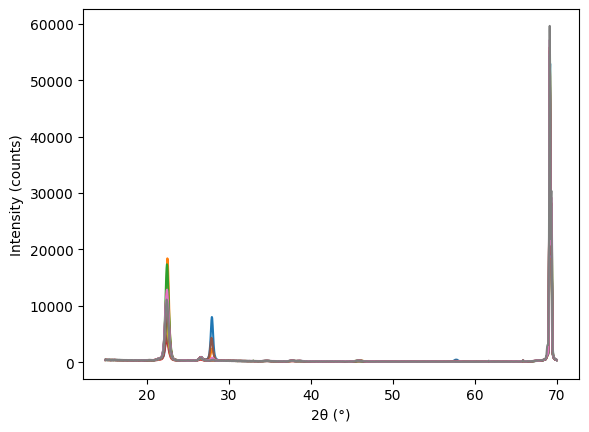

In [20]:
# Now, inspect
print(dfs[col_1].columns)  # Check columns
print(dfs[col_1].index)  # Check index

# Now, we can plot the data
fig, ax = plt.subplots()
ax.plot(dfs[col_1][datatype_x], dfs[col_1][datatype_y])
ax.set_xlabel(datatype_x)
ax.set_ylabel(datatype_y)
plt.show()
